In [1]:
#Observed trend1:majorty of the tweets have zero polarity from each of the media outlets. 

In [2]:
#Observed trend2:CNN has a negative tweet polarity during the date of the analysis. 

In [3]:
#Observed trend3: CBS has the highest positive tweet polarity during the date the analysis was performed. 

In [4]:
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
# Target User Accounts
target_user = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")

# List for dictionaries of results
tweet_list = []
sentiments = []
counter = 1
# Loop through each user
for user in target_user:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)
        
        #toDataFrame(tweet)
        # Loop through all tweets
        for tweet in public_tweets:
            tweet_list.append(tweet)
            results = analyzer.polarity_scores(tweet['text'])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            sentiments.append({"Date": tweet['created_at'], 
                               "Text":tweet['text'],
                               "Name":user,
                               "Tweets Ago": counter,
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg})
            counter += 1

In [6]:
# Convert sentiments into DataFrame and rearranging the columns.
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd = sentiments_pd[['Date', 'Name', 'Text','Compound', 'Positive', 'Negative','Neutral', 'Tweets Ago']]
sentiments_pd.shape

(500, 8)

In [7]:
sentiments_pd.head(5)

,Date,Name,Text,Compound,Positive,Negative,Neutral,Tweets Ago
0,Sat Jun 30 18:12:00 +0000 2018,@BBC,😨👀 This AI software uses wireless signals to w...,0.0000,0.000,1.000,0.000,1
1,Sat Jun 30 17:04:00 +0000 2018,@BBC,💪👕 Doing laundry on Fair Isle is not for the f...,0.3802,0.166,0.834,0.000,2
2,Sat Jun 30 16:04:06 +0000 2018,@BBC,🎧✊ DJ Switch has big plans for the future. htt...,0.0000,0.000,1.000,0.000,3
3,Sat Jun 30 16:03:09 +0000 2018,@BBC,RT @5liveSport: What a stat 🔥⚽️\n\nMbappe is t...,0.0000,0.000,1.000,0.000,4
4,Sat Jun 30 15:07:03 +0000 2018,@BBC,💄 Does your lipstick threaten the future of on...,-0.3818,0.000,0.843,0.157,5


In [8]:
sentiments_pd=sentiments_pd.sort_values(by='Date') # sorting the dataframe by time. 
sentiments_pd.head(5)

,Date,Name,Text,Compound,Positive,Negative,Neutral,Tweets Ago
199,Fri Jun 08 13:58:15 +0000 2018,@CBS,We all get by with a little help from our frie...,0.9078,0.436,0.564,0.0,200
198,Fri Jun 08 15:00:03 +0000 2018,@CBS,Here's @laChanze with a reminder that you can ...,0.0000,0.000,1.000,0.0,199
197,Fri Jun 08 19:46:17 +0000 2018,@CBS,Join @etnow's @DDirecto this Sunday on the #To...,0.2960,0.180,0.820,0.0,198
110,Fri Jun 15 18:48:29 +0000 2018,@CBS,"Casting Alert! @paulwesley, @DaniaJRamirez &am...",0.3595,0.128,0.872,0.0,111
130,Fri Jun 15 18:48:29 +0000 2018,@CBS,"Casting Alert! @paulwesley, @DaniaJRamirez &am...",0.3595,0.128,0.872,0.0,131


In [9]:
sentiments_pd.to_csv('output.csv', sep='\t', encoding='utf-8') # exporting the data into  CSV file. 

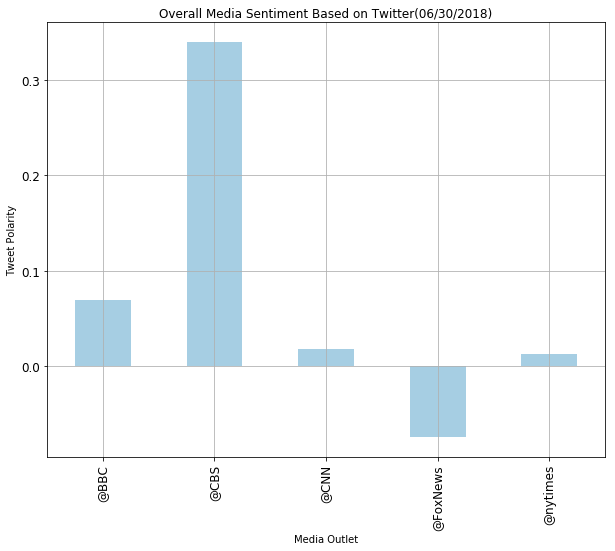

In [10]:
sentiments_pd.groupby('Name')[['Compound']].mean().plot(kind = "bar", title='Overall Media Sentiment Based on Twitter(06/30/2018)', colormap='Paired', 
                                                    fontsize=12, figsize=(10, 8), legend=False)
plt.ylabel("Tweet Polarity")
plt.xlabel("Media Outlet")
plt.grid(True)
plt.savefig('fig1.png',bbox_inches='tight')
plt.show()


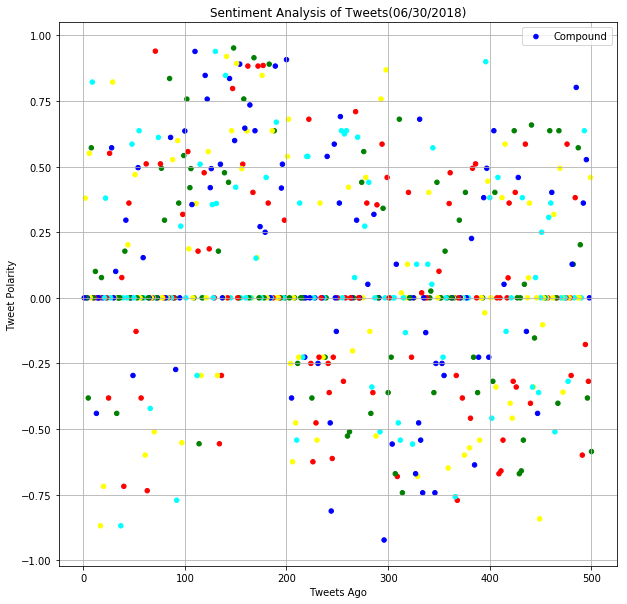

In [11]:
# Create plot
colors = ['blue', 'green', 'red', 'yellow','cyan']
x_vals = sentiments_pd["Tweets Ago"]
y_vals = sentiments_pd["Compound"]
plt.figure(figsize=(10,10))

plt.scatter(x_vals, y_vals, marker="o",c=colors,s=20)

plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(True)
plt.title('Sentiment Analysis of Tweets(06/30/2018)')
colors = ['blue', 'green', 'red', 'yellow','cyan']
labels= ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]
plt.savefig('fig2.png',bbox_inches='tight')
plt.legend()
plt.show()

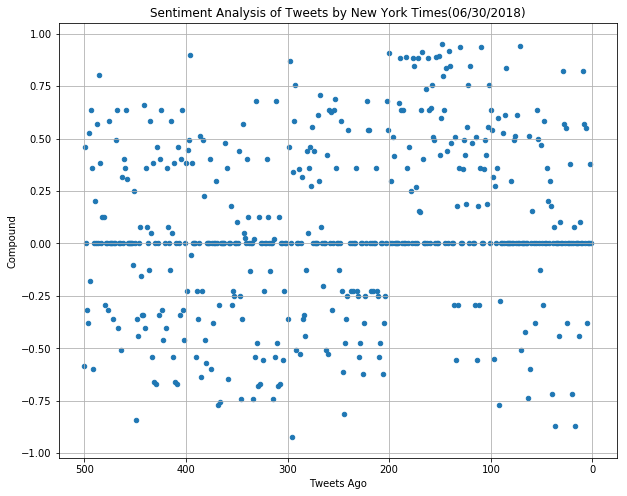

In [12]:
sentiments_pd.plot(kind='scatter',y='Compound', x='Tweets Ago',s=20,figsize=(10, 8)).invert_xaxis()
plt.title('Sentiment Analysis of Tweets by New York Times(06/30/2018)')
plt.savefig('fig3.png',bbox_inches='tight')
plt.grid(True)
plt.show()